In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [12]:
#하이퍼 파라메터 정의(매개변수들)
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 #출력갯수 = 숫자의 갯수
N_HIDDEN = 128 
VALIDATION_SPLIT = 0.2 #검증을 위해 남겨둘 훈련 데이타
DROPOUT = 0.3

In [13]:
# MNIST 데이타셋 로드(MNIST는 숫자만, eMNIST는 숫자+알파벳, 패션MNIST는 옷그림들이 있다)
# X값 훈련용, 테스트 데이터를 각각 60,000개와 10,000개로 나눈다
# 레이블(정답, Y값)에 대한 원핫 인코딩을 자동으로 적용한다
# 아래 데이타셋을 .png 형태의 이미지를 이미 숫자화한 배열형태로 바꾸어 놓은 것이며, .csv형태가 분석 초기 데이타이다.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train은 60,000개 행으로 28x28 값을 가진다. 이를 60,000 x 784(28x28)의 행렬형태로 변환한다.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 입력을 [0, 1] 사이로 정규화
X_train /= 255.0
X_train /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'train samples')

# 레이블을 원한 엔코딩, 그래야 행렬 연산이 가능함
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 train samples


In [14]:
# 모델 구축(정의)
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='input_Dense_layer_1', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN, name='hidden_Dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES, name='output_Dense_layer_3', activation='softmax'))

In [15]:
# 모델 컴파일
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
# 모델 형태 보기
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_Dense_layer_1 (Dense)  (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_Dense_layer_2 (Dense) (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
output_Dense_layer_3 (Dense) (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 훈련
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_accuracy')

hist = model.fit(x = X_train, y = Y_train, 
          batch_size = BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
          callbacks=[early_stopping])

Epoch 1/200
375/375 [==============================] - 2s 4ms/step - loss: 2.3008 - accuracy: 0.1198 - val_loss: 2.3007 - val_accuracy: 0.1060
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 3/200
375/375 [==============================] - 1s 4ms/step - loss: 2.2997 - accuracy: 0.1140 - val_loss: 2.3004 - val_accuracy: 0.1060
Epoch 4/200
375/375 [==============================] - 1s 4ms/step - loss: 2.2996 - accuracy: 0.1140 - val_loss: 2.3004 - val_accuracy: 0.1060
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 2.2995 - accuracy: 0.1140 - val_loss: 2.3003 - val_accuracy: 0.1060
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 2.2993 - accuracy: 0.1140 - val_loss: 2.3003 - val_accuracy: 0.1060
Epoch 7/200
375/375 [==============================] - 1s 4ms/step - loss: 2.2993 - accuracy: 0.1140 - val_loss: 2.3002 - val_accuracy: 0.1060

In [18]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test loss: ", test_loss, "Test accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 84.5158 - accuracy: 0.2156
Test loss:  84.5158462524414 Test accuracy: 0.21559999883174896


In [19]:
# 모델 저장
model.save('mnist_opt_level_02_dropout.h5')

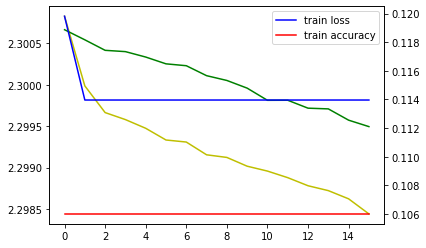

In [20]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['train loss', 'train accuracy'])
plt.show()